# Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV

# Load

In [3]:
df_original = pd.read_csv("HW3_movie_metadata.csv")
df = df_original.copy()

In [4]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,"4,993.00","5,028.00","4,939.00","5,020.00","5,036.00","4,159.00","5,043.00","5,043.00","5,030.00","5,022.00","4,551.00","4,935.00","5,030.00","5,043.00","4,714.00","5,043.00"
mean,140.19,107.20,686.51,645.01,"6,560.05","48,468,407.53","83,668.16","9,699.06",1.37,272.77,"39,752,620.44","2,002.47","1,651.75",6.44,2.22,"7,525.96"
std,121.60,25.20,"2,813.33","1,665.04","15,020.76","68,452,990.44","138,485.26","18,163.80",2.01,377.98,"206,114,898.45",12.47,"4,042.44",1.13,1.39,"19,320.45"
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,"1,916.00",0.00,1.60,1.18,0.00
25%,50.00,93.00,7.00,133.00,614.00,"5,340,987.50","8,593.50","1,411.00",0.00,65.00,"6,000,000.00","1,999.00",281.00,5.80,1.85,0.00
50%,110.00,103.00,49.00,371.50,988.00,"25,517,500.00","34,359.00","3,090.00",1.00,156.00,"20,000,000.00","2,005.00",595.00,6.60,2.35,166.00
75%,195.00,118.00,194.50,636.00,"11,000.00","62,309,437.50","96,309.00","13,756.50",2.00,326.00,"45,000,000.00","2,011.00",918.00,7.20,2.35,"3,000.00"
max,813.00,511.00,"23,000.00","23,000.00","640,000.00","760,505,847.00","1,689,764.00","656,730.00",43.00,"5,060.00","12,215,500,000.00","2,016.00","137,000.00",9.50,16.00,"349,000.00"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [7]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross          genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget         title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168.00                  87.00     0.00                     548.00                  Ewen Bremner         22,000.00               8,579,684.00   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0.00                  end credits roll call|four word title|funeral|secret|uncle         http:

In [8]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
# # Set the style of seaborn for better aesthetics
# sns.set(style="whitegrid")

# # Get the number of numerical columns and decide the number of columns in the grid
# num_cols = df.select_dtypes(include='number').columns
# num_plots = len(num_cols)

# # Set the number of columns in the grid (you can adjust this based on your preference)
# num_cols_in_grid = 6

# # Calculate the number of rows needed
# num_rows = (num_plots + num_cols_in_grid - 1) // num_cols_in_grid

# # Increase the height of each subplot by adjusting the figsize parameter
# fig, axes = plt.subplots(num_rows, num_cols_in_grid, figsize=(50, 20))  # Adjust the figure size as needed

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Loop through each numerical column and plot histogram with KDE on a separate subplot
# for i, column in enumerate(num_cols):
#     sns.histplot(df[column], kde=False, bins=30, ax=axes[i])  # Adjust bins as needed
#     axes[i].set_title(f'Histogram with KDE for {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# # Remove any empty subplots if the number of plots is not a multiple of num_cols_in_grid
# for j in range(num_plots, len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout for better spacing
# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

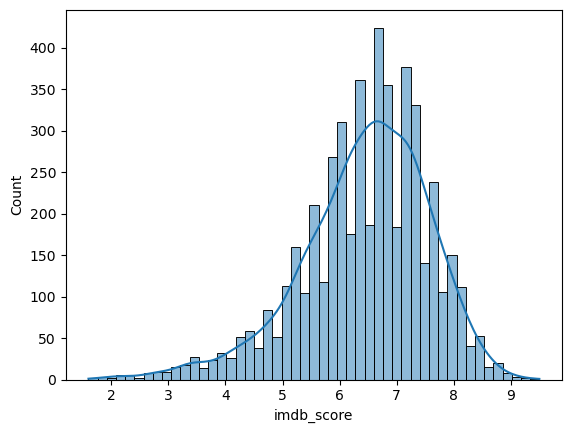

In [10]:
# Distribution of the data
sns.histplot(df["imdb_score"], kde=True)

# Preprocessing

Cut the middle part of the data to avoid the ambiguity between low and high and use median as the boundary

Choose to cut percentile 40-60

In [11]:
median = df.imdb_score.median()
print("median =", median)

median = 6.6


In [12]:
# Calculate the 40th and 60th percentiles of the 'imdb_score' column
percentile_40 = df['imdb_score'].quantile(0.4)
percentile_60 = df['imdb_score'].quantile(0.6)

# Create a mask to select rows outside the 40-60 percentile range
mask = (df['imdb_score'] < percentile_40) | (df['imdb_score'] > percentile_60)

# Use the mask to drop the selected rows
df_cut = df[mask]

df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,"424,760.00",Drama|Sci-Fi|Thriller,Shane Carruth,...,371.00,English,USA,PG-13,"7,000.00","2,004.00",45.00,7.00,1.85,19000
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,"2,040,920.00",Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.00,Spanish,USA,R,"7,000.00","1,992.00",20.00,6.90,1.37,0
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,1.00,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84


Add new binary column call "label" with 1 = high score, 0 = low score

In [13]:
df_cut['label'] = np.where(df_cut['imdb_score'] < median, 0.0, 1.0)
df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,label
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,1.00
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,1.00
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,1.00
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0,1.00
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,...,English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,"424,760.00",Drama|Sci-Fi|Thriller,Shane Carruth,...,English,USA,PG-13,"7,000.00","2,004.00",45.00,7.00,1.85,19000,1.00
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,"2,040,920.00",Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,Spanish,USA,R,"7,000.00","1,992.00",20.00,6.90,1.37,0,1.00
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4,1.00
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84,1.00


In [14]:
df_cut[["label", "imdb_score"]]

,label,imdb_score
0,1.00,7.90
1,1.00,7.10
3,1.00,8.50
4,1.00,7.10
6,0.00,6.20
...,...,...
5033,1.00,7.00
5035,1.00,6.90
5036,1.00,7.80
5038,1.00,7.70


<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

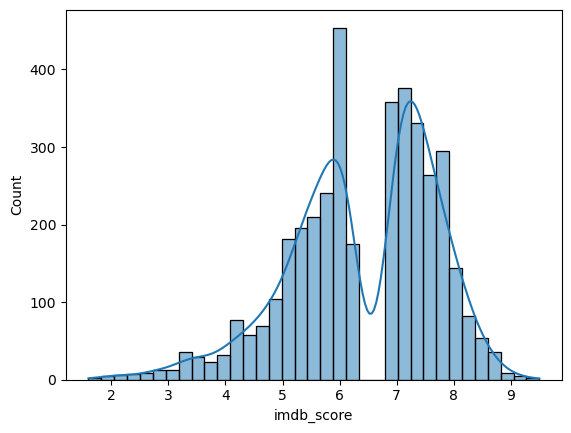

In [15]:
sns.histplot(df_cut["imdb_score"], kde=True)

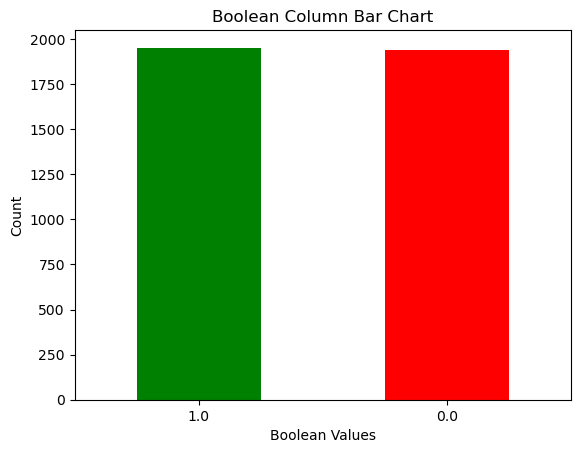

In [16]:
# Count the occurrences of each boolean value in the 'BooleanColumn'
counts = df_cut['label'].value_counts()

# Plot a bar chart
counts.plot(kind='bar', color=['green', 'red'], rot=0)

# Add labels and title
plt.xlabel('Boolean Values')
plt.ylabel('Count')
plt.title('Boolean Column Bar Chart')

# Show the plot
plt.show()

Drop imdb_score column

In [17]:
df_cut.drop(columns=["imdb_score"],inplace=True)

Drop the categorical columns

In [18]:
# Get the list of categorical columns
cat_cols = df_cut.select_dtypes(include='object').columns

# Drop the categorical columns
df2 = df_cut.drop(columns=cat_cols)

Selected columns

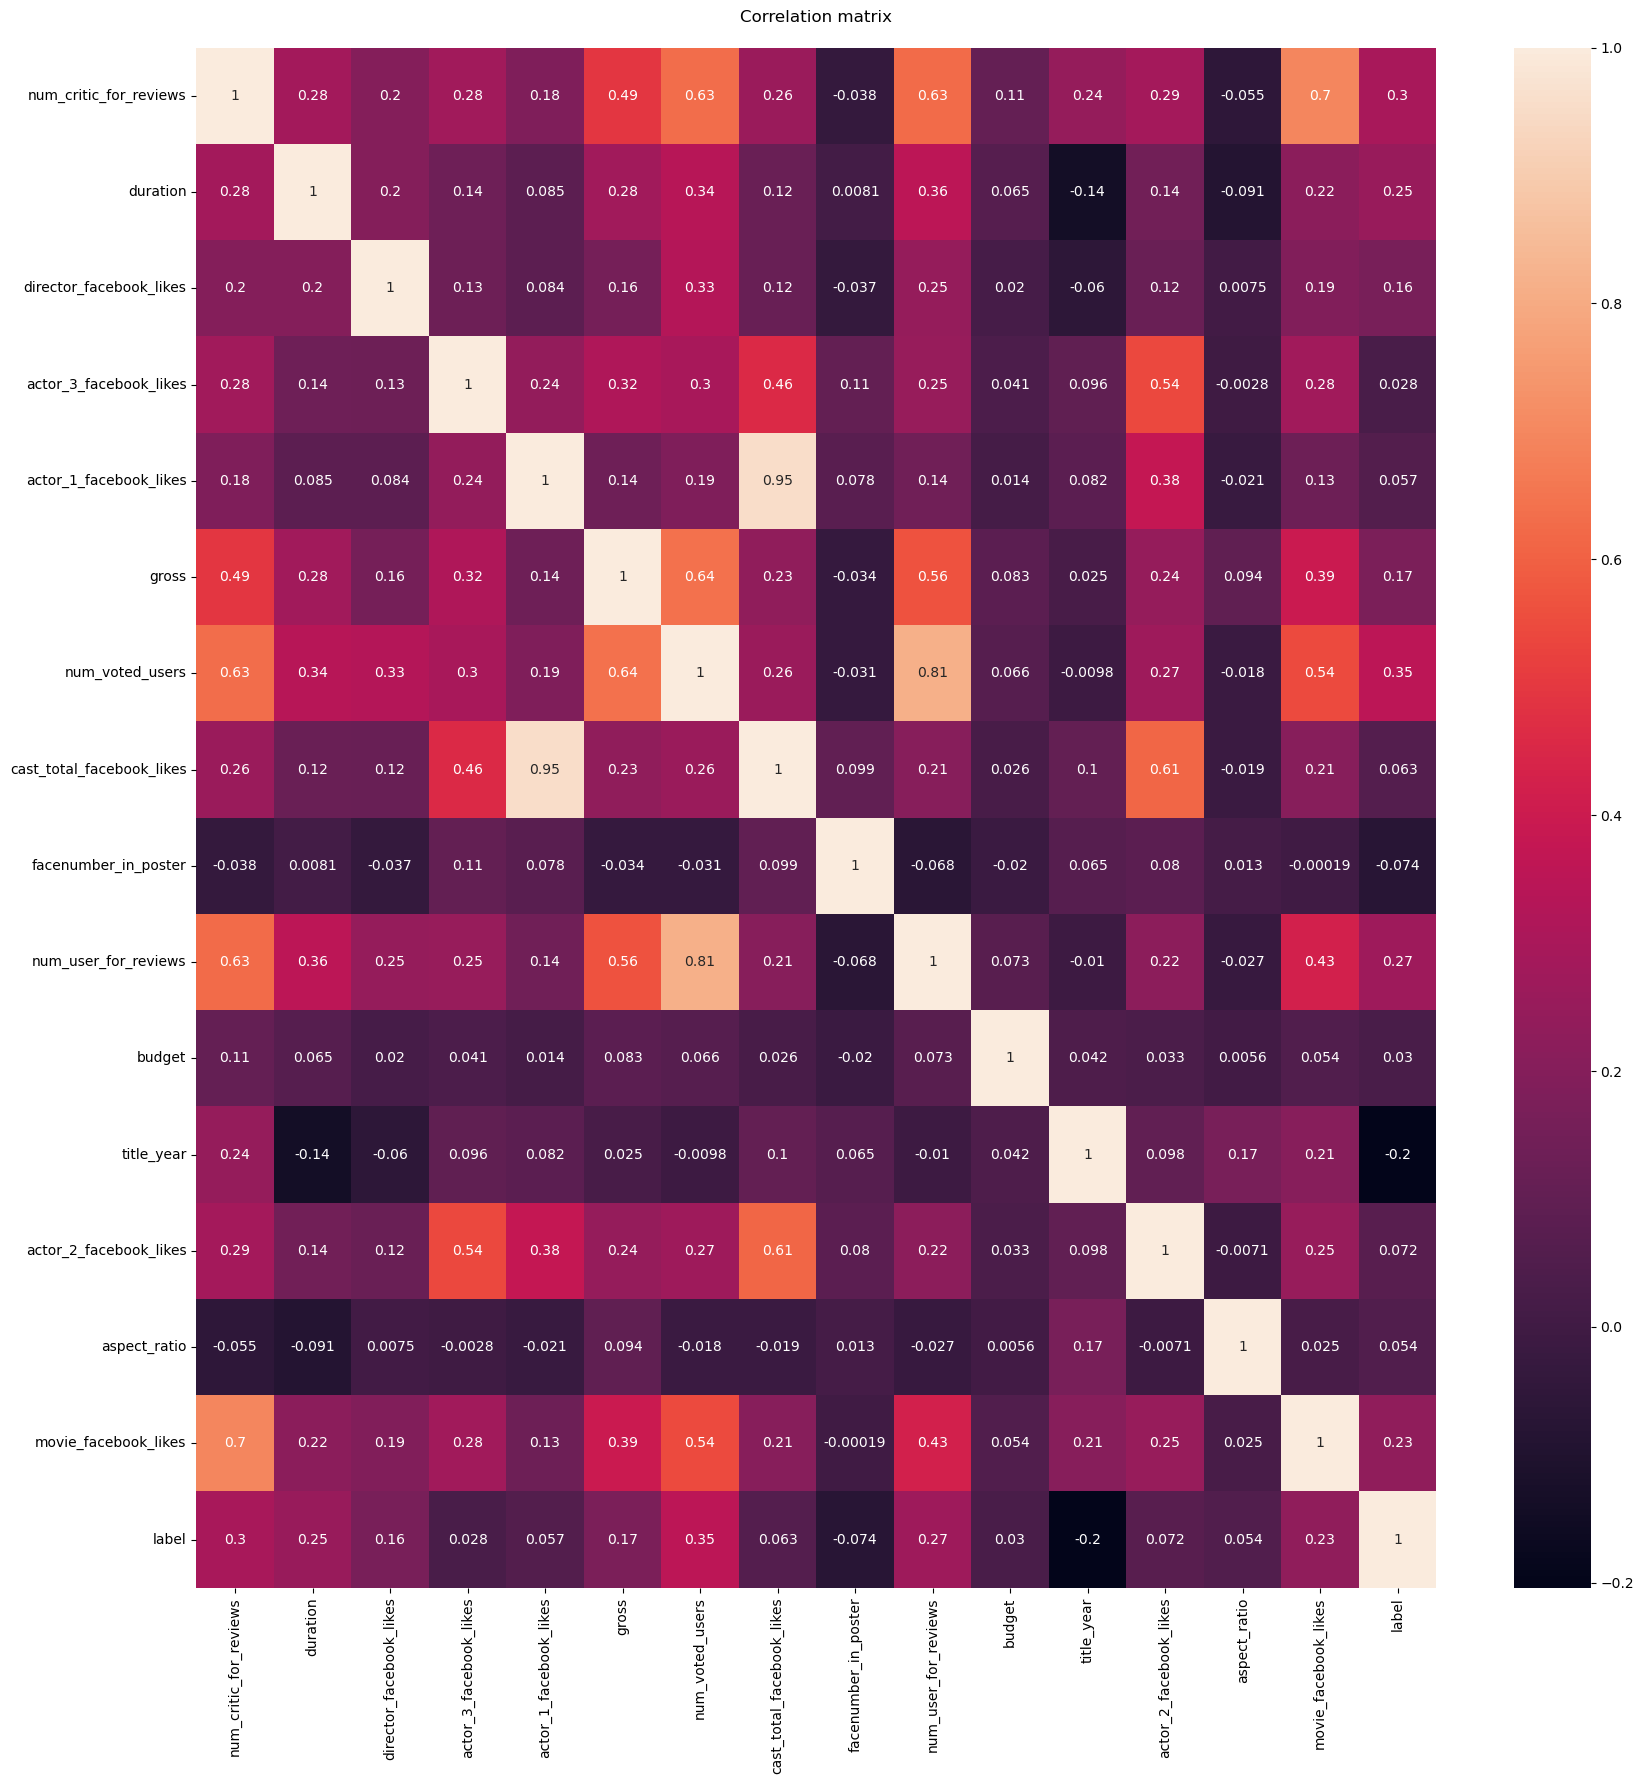

In [19]:
corr = df_cut.corr()
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()  

In [20]:
# Set the target column
target_column = 'label'

# Set the correlation threshold
correlation_threshold = 0.2

# Calculate the correlation between features and the target column
correlation_with_target = df_cut.corr()[target_column]

# Find columns with correlation below the threshold
selected_columns = [col for col in correlation_with_target.index if abs(correlation_with_target[col]) > correlation_threshold]
df2[selected_columns]

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes,label
0,723.00,178.00,886204,"3,054.00","2,009.00",33000,1.00
1,302.00,169.00,471220,"1,238.00","2,007.00",0,1.00
3,813.00,164.00,1144337,"2,701.00","2,012.00",164000,1.00
4,NaN,NaN,8,NaN,NaN,0,1.00
6,392.00,156.00,383056,"1,902.00","2,007.00",0,0.00
...,...,...,...,...,...,...,...
5033,143.00,77.00,72639,371.00,"2,004.00",19000,1.00
5035,56.00,81.00,52055,130.00,"1,992.00",0,1.00
5036,NaN,84.00,36,1.00,"2,005.00",4,1.00
5038,1.00,87.00,629,6.00,"2,013.00",84,1.00


In [21]:
df2[selected_columns].corr()

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes,label
num_critic_for_reviews,1.00,0.28,0.63,0.63,0.24,0.70,0.30
duration,0.28,1.00,0.34,0.36,-0.14,0.22,0.25
num_voted_users,0.63,0.34,1.00,0.81,-0.01,0.54,0.35
num_user_for_reviews,0.63,0.36,0.81,1.00,-0.01,0.43,0.27
title_year,0.24,-0.14,-0.01,-0.01,1.00,0.21,-0.20
movie_facebook_likes,0.70,0.22,0.54,0.43,0.21,1.00,0.23
label,0.30,0.25,0.35,0.27,-0.20,0.23,1.00


In [22]:
# remove num_user_for_reviews from selection (it has high multicolinearity)
selected_columns.remove("num_user_for_reviews")
selected_columns.remove("label")
selected_columns

['num_critic_for_reviews',
 'duration',
 'num_voted_users',
 'title_year',
 'movie_facebook_likes']

Encode the int columns as float

In [23]:
df2['num_voted_users'] = df2['num_voted_users'].astype('float64')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5039
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3846 non-null   float64
 1   duration                   3878 non-null   float64
 2   director_facebook_likes    3796 non-null   float64
 3   actor_3_facebook_likes     3871 non-null   float64
 4   actor_1_facebook_likes     3885 non-null   float64
 5   gross                      3141 non-null   float64
 6   num_voted_users            3891 non-null   float64
 7   cast_total_facebook_likes  3891 non-null   int64  
 8   facenumber_in_poster       3881 non-null   float64
 9   num_user_for_reviews       3872 non-null   float64
 10  budget                     3496 non-null   float64
 11  title_year                 3792 non-null   float64
 12  actor_2_facebook_likes     3879 non-null   float64
 13  aspect_ratio               3622 non-null   float

Drop NaN

In [25]:
df2.isna().sum()

num_critic_for_reviews        45
duration                      13
director_facebook_likes       95
actor_3_facebook_likes        20
actor_1_facebook_likes         6
gross                        750
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          10
num_user_for_reviews          19
budget                       395
title_year                    99
actor_2_facebook_likes        12
aspect_ratio                 269
movie_facebook_likes           0
label                          0
dtype: int64

In [26]:
# drop the NAN of columns which are discrete
df3 = df2.dropna(subset=['title_year', 'aspect_ratio'])
df3.isna().sum()

num_critic_for_reviews        11
duration                       1
director_facebook_likes        0
actor_3_facebook_likes        10
actor_1_facebook_likes         3
gross                        479
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster           8
num_user_for_reviews           2
budget                       242
title_year                     0
actor_2_facebook_likes         6
aspect_ratio                   0
movie_facebook_likes           0
label                          0
dtype: int64

In [27]:
df4 = df3.fillna(df2.median())
df4.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
label                        0
dtype: int64

Scale the feature

In [28]:
feature_columns = list(df4.columns)
feature_columns.remove("label")
feature_columns

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes']

In [29]:
X = df4[feature_columns]
y = df4["label"]

In [30]:
scaler=preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns)
X_scaled

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.89,0.53,0.00,0.04,0.00,1.00,0.52,0.01,0.00,0.60,0.02,0.93,0.01,0.04,0.09
1,0.37,0.50,0.03,0.04,0.06,0.41,0.28,0.07,0.00,0.24,0.02,0.91,0.04,0.08,0.00
2,1.00,0.49,1.00,1.00,0.04,0.59,0.68,0.16,0.00,0.53,0.02,0.96,0.17,0.08,0.47
3,0.48,0.46,0.00,0.17,0.04,0.44,0.23,0.07,0.00,0.38,0.02,0.91,0.08,0.08,0.00
4,0.40,0.29,0.00,0.01,0.00,0.26,0.17,0.00,0.02,0.08,0.02,0.94,0.00,0.05,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,0.08,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.05,0.00
3538,0.09,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.81,0.00,0.05,0.00
3539,0.01,0.23,0.01,0.00,0.00,0.03,0.00,0.00,0.02,0.00,0.00,0.96,0.00,1.00,0.00
3540,0.17,0.22,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.07,0.00,0.88,0.00,0.05,0.05


In [31]:
",".join([f'"{col}"' for col in X_scaled.columns])

'"num_critic_for_reviews","duration","director_facebook_likes","actor_3_facebook_likes","actor_1_facebook_likes","gross","num_voted_users","cast_total_facebook_likes","facenumber_in_poster","num_user_for_reviews","budget","title_year","actor_2_facebook_likes","aspect_ratio","movie_facebook_likes"'

Split the data

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,shuffle=True,random_state=100)
print("len(X_train) =", len(X_train))
print("len(X_test)  =", len(X_test))
print("len(y_train) =", len(y_train))
print("len(y_test)  =", len(y_test))

len(X_train) = 2479
len(X_test)  = 1063
len(y_train) = 2479
len(y_test)  = 1063


# Model: ANN

clf1: all features

In [33]:
clf1=MLPClassifier(hidden_layer_sizes=(8,8), activation="relu" ,solver='adam',random_state=1, max_iter=2000)

clf1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=2000, random_state=1)

In [34]:
y_train_pred1=clf1.predict(X_train)
y_pred1 =clf1.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       521
         1.0       0.84      0.76      0.80       542

    accuracy                           0.80      1063
   macro avg       0.81      0.81      0.80      1063
weighted avg       0.81      0.80      0.80      1063

Accuracy on train:   0.815 

Accuracy on test:   0.804 



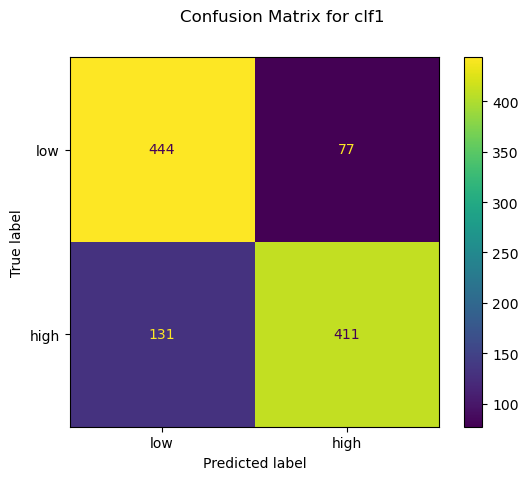

In [48]:
print("Classification Report: \n", metrics.classification_report(y_test, y_pred1))
print("Accuracy on train:  ",metrics.accuracy_score(y_train,y_train_pred1).round(3),'\n')
print("Accuracy on test:  ",metrics.accuracy_score(y_test,y_pred1).round(3),'\n')

fig=metrics.plot_confusion_matrix(clf1, X_test, y_test,display_labels=['low','high'])
fig.figure_.suptitle("Confusion Matrix for clf1")
plt.show()

clf2: only selected features

In [36]:
selected_columns

['num_critic_for_reviews',
 'duration',
 'num_voted_users',
 'title_year',
 'movie_facebook_likes']

In [37]:
clf2=MLPClassifier(hidden_layer_sizes=(8,8), activation="relu" ,solver='adam',random_state=1, max_iter=2000)

clf2.fit(X_train[selected_columns], y_train)

MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=2000, random_state=1)

In [38]:
y_train_pred2=clf2.predict(X_train[selected_columns])
y_pred2 =clf2.predict(X_test[selected_columns])

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.70      0.84      0.76       521
         1.0       0.81      0.65      0.72       542

    accuracy                           0.74      1063
   macro avg       0.75      0.75      0.74      1063
weighted avg       0.75      0.74      0.74      1063

Accuracy on train:   0.741 

Accuracy on test:   0.744 



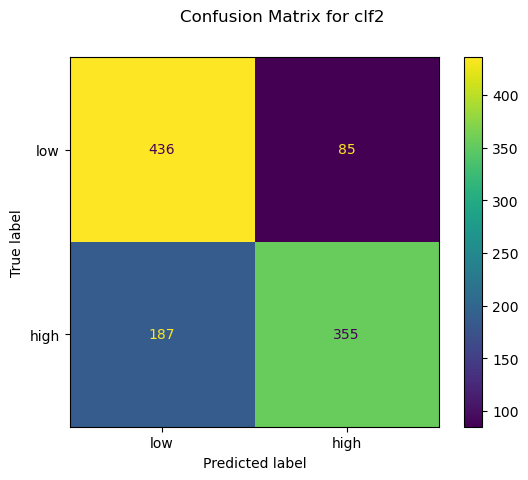

In [47]:
print("Classification Report: \n", metrics.classification_report(y_test, y_pred2))
print("Accuracy on train:  ",metrics.accuracy_score(y_train,y_train_pred2).round(3),'\n')
print("Accuracy on test:  ",metrics.accuracy_score(y_test,y_pred2).round(3),'\n')

fig=metrics.plot_confusion_matrix(clf2, X_test[selected_columns], y_test,display_labels=['low','high'])
fig.figure_.suptitle("Confusion Matrix for clf2")
plt.show()

clf3: Gridsearch

In [40]:
cv = StratifiedKFold(5)
layers=[(8*i,8*i) for i in range(10)]
activation=['identity','logistic','tanh','relu']
param_grid = dict(hidden_layer_sizes=layers,activation=activation)
clf3=MLPClassifier(random_state=1, max_iter=2000)
grid = GridSearchCV(estimator=clf3, param_grid=param_grid, cv=cv,scoring='accuracy') 
grid_result=grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_)

Best Score:  0.8152411208862823
Best Params:  {'activation': 'relu', 'hidden_layer_sizes': (32, 32)}


In [44]:
y_train_pred3 = grid.predict(X_train)
y_pred3=grid.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       521
         1.0       0.88      0.78      0.83       542

    accuracy                           0.83      1063
   macro avg       0.84      0.83      0.83      1063
weighted avg       0.84      0.83      0.83      1063

Accuracy on train:   0.741 

Accuracy on test:   0.833 



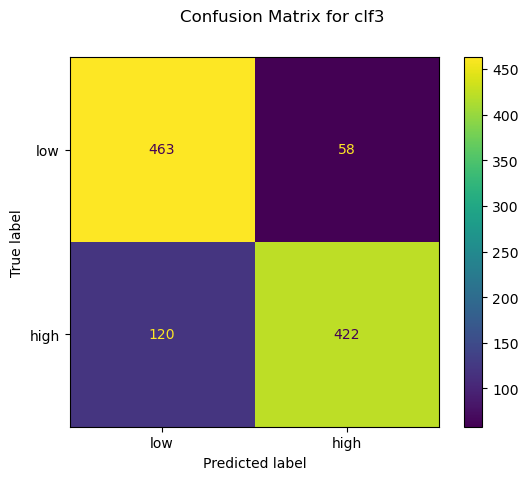

In [46]:
print("Classification Report: \n", metrics.classification_report(y_test, y_pred3))
print("Accuracy on train:  ",metrics.accuracy_score(y_train,y_train_pred2).round(3),'\n')
print("Accuracy on test:  ",metrics.accuracy_score(y_test,y_pred3).round(3),'\n')

fig=metrics.plot_confusion_matrix(grid, X_test, y_test,display_labels=['low','high'])
fig.figure_.suptitle("Confusion Matrix for clf3")
plt.show()

# Evaluation

The gridsearch model has the best accuracy on the test set